In the last part, I have covered **Linear Regression** and we build our own **Simple Linear Regression** Class and Compared it with Sklearn's **LinearRegression** Class. 

Now, let’s explore Multiple Linear Regression (MLR), a powerful statistical technique used in data science and predictive modeling. 🌟

# What is Multiple Linear Regression?

MLR, also known as Multiple Linear Regression, models the linear relationship between one dependent variable (response) and two or more independent variables (predictors).

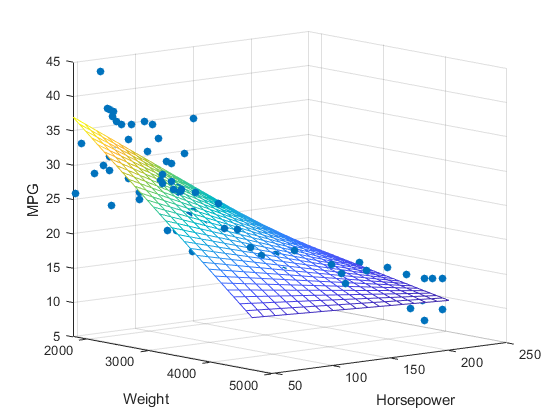

The goal is to predict the outcome of the dependent variable based on the values of multiple explanatory variables.

Before moving ahead, Let's discuss one important question:

### Why Would One Use a Multiple Regression Over a Simple Linear Regression?

A dependent variable is rarely explained by only one variable. 

Hence, we use Multiple Linear Regression, to explain a dependent variable using more than one independent variable. 

*Note: However, the model assumes that there are no major correlations (multicollinearity) between the independent variables.*

### Formula for MLR:

The MLR equation for predicting the dependent variable (Y) based on multiple independent variables (X1, X2, …, Xn) is:

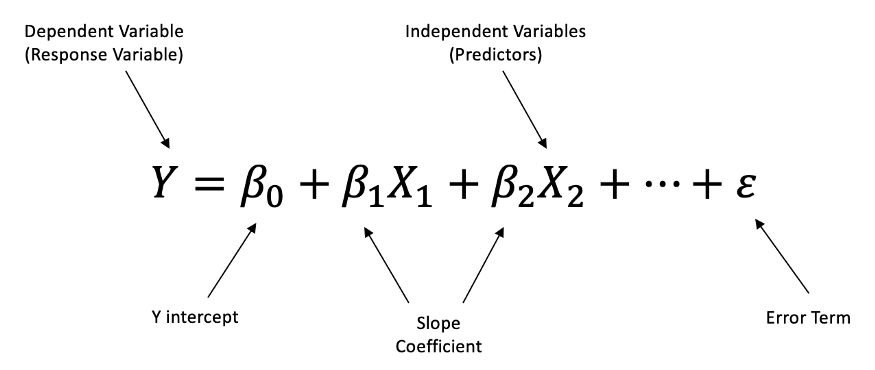

Where:
* (Y) = the dependent variable.
* β 0 = y-intercept (constant term)
* (beta_1, beta_2, …, beta_n) = slope coefficients for each explanatory variable.
* (X_1, X_2, …, X_n) = the independent variables.
* ϵ = the model’s error term (also known as the residuals)

## Importing Dataset

In this implementation I am using **Diabetes Data** of sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
(inputs, target) = load_diabetes(return_X_y = True) 

In [3]:
inputs.shape

(442, 10)

In [4]:
target.shape

(442,)

## Splitting data into train and test datasets

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2 , random_state = 42)

In [8]:
train_inputs

array([[ 0.07076875,  0.05068012,  0.01211685, ...,  0.03430886,
         0.02736405, -0.0010777 ],
       [-0.00914709,  0.05068012, -0.01806189, ...,  0.07120998,
         0.00027248,  0.01963284],
       [ 0.00538306, -0.04464164,  0.04984027, ..., -0.00259226,
         0.01703607, -0.01350402],
       ...,
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
        -0.01090325, -0.0010777 ],
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
        -0.03845972, -0.03835666],
       [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
        -0.00514219, -0.0010777 ]])

In [9]:
train_inputs.shape

(353, 10)

## Building our own **Multiple Linear Regression** Class

In [13]:
import numpy as np

In [14]:
class MultipleLinearRegression:
    
    # Creating an initializor
    def __init__(self):
        self.coeff = None
        self.intcpt = None
        
        
    # Creating 'fit' Function
    def fit(self, train_inputs, train_target):
        
        # The numpy.insert() function inserts values along the mentioned axis before the given indices.
        train_inputs = np.insert(train_inputs, 0, 1, axis = 1) # Syntax : numpy.insert(array, object, values, axis = None) 
        
        # Calculating slope of the line (beta-not):
        betas = np.linalg.inv(np.dot(train_inputs.T, train_inputs)).dot(train_inputs.T).dot(train_target)
        
        self.intcpt = betas[0]
        
        
        # Calculating coefficent of the line(all betas):
        self.coeff = betas[1:]
        
    @property
    def coefficients(self):
        if self.coeff is not None:
            return self.coeff
        else:
            print("Model not fitted yet.")
            return None

    @property
    def intercept(self):
        if self.intcpt is not None:
            return self.intcpt
        else:
            print("Model not fitted yet.")
            return None
        
        
    # Creating 'predict' Function
    def predict(self, test_inputs):
        return np.dot(test_inputs, self.coeff) + self.intcpt

In [15]:
mlr = MultipleLinearRegression()

In [16]:
mlr.fit(train_inputs, train_target)

In [17]:
mlr.coefficients

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

In [18]:
mlr.intercept

151.34560453986003

## Validation Results: Using sklearn's LinearRegression class

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(train_inputs, train_target)

LinearRegression()

In [22]:
lr.coef_

array([  37.90402135, -241.96436231,  542.42875852,  347.70384391,
       -931.48884588,  518.06227698,  163.41998299,  275.31790158,
        736.1988589 ,   48.67065743])

Exactly same **betas**. Let's check the intercept value also.

In [23]:
lr.intercept_

151.34560453985995

Same **interecept** values. 

Hence, our model is working fine.

## Checking Regression Metrics: Using R-squared (R²) Score

R-squared (R²): Measures the proportion of variance in the dependent variable explained by the independent variables.

In [24]:
from sklearn.metrics import r2_score

In [26]:
mlr_pred = mlr.predict(test_inputs)

In [27]:
lr_pred = lr.predict(test_inputs)

In [29]:
print("LR R2",r2_score(test_target,lr_pred))

print("MLR R2",r2_score(test_target,mlr_pred))

LR R2 0.4526027629719195
MLR R2 0.4526027629719199


Yay, we got same results.

We had created an **OLS Multiple Linear Regression Model**. 

## When to Use MLR?

MLR is suitable when you want to understand how several independent variables collectively influence a single dependent variable.

Example: Predicting house prices based on features like square footage, number of bedrooms, and location.

### Advantages of Multiple Regression:

* **More Realistic**: Real-world phenomena are rarely explained by only one variable. Multiple regression captures the complexity of relationships.
* **Optimal Predictions**: When faced with multiple predictors, MLR combines their information to make a single, optimal prediction for the dependent variable.
* **Accounting for Confounding**: MLR helps control for confounding variables. For example, age and height both influence weight, but MLR considers both simultaneously.


> Stay tuned for Gradient Descent - Linear Regression and Don't forget to **Star** this Github Repository for more such contents.